In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def simulate_simple_SI(N, I0, beta, nDays):


    I = np.zeros(nDays)
    I[0] = I0
    
    for t in range(1, nDays):
        I[t] = I[t-1] + beta * I[t-1]
    
    return I

In [5]:
N = 100  # N
I0 = 3   # 
beta = 0.02  # transmission rate
nDays = 365  # 1 year

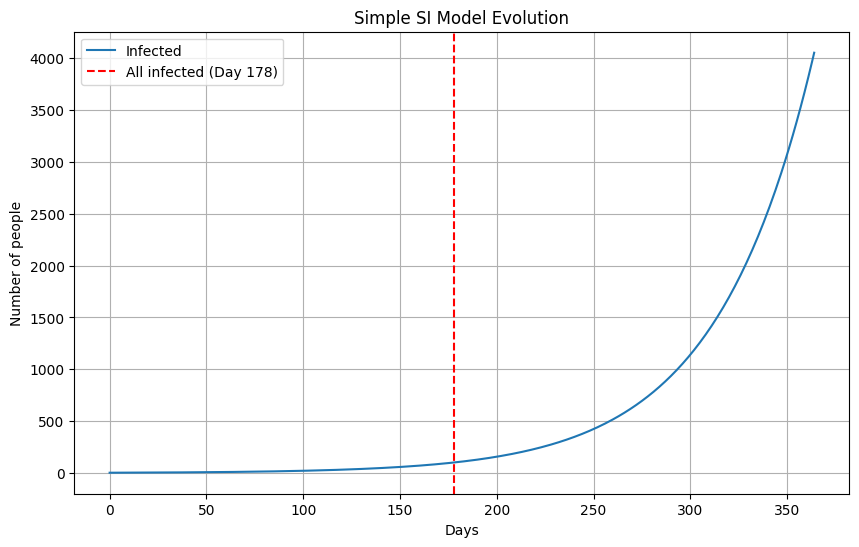

In [7]:
I_simple = simulate_simple_SI(N, I0, beta, nDays)

day_all_infected = np.where(I_simple > N)[0][0]


# plot the results
plt.figure(figsize=(10, 6))
plt.plot(I_simple, label='Infected')
plt.axvline(x=day_all_infected, color='r', linestyle='--', 
            label=f'All infected (Day {day_all_infected})')
plt.xlabel('Days')
plt.ylabel('Number of people')
plt.title('Simple SI Model Evolution')
plt.legend()
plt.grid(True)

plt.savefig("./SI_Infection_1_1.png")

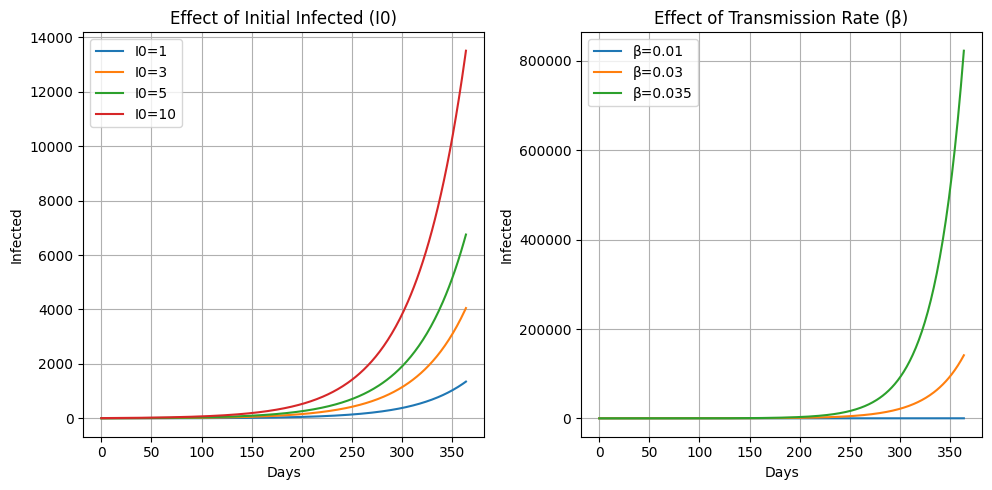

In [15]:
# Vary I0

plt.figure(figsize=(15, 5))

plt.subplot(131)
for i0 in [1, 3, 5, 10]:
    I = simulate_simple_SI(N, i0, beta, nDays)
    plt.plot(I, label=f'I0={i0}')
plt.title('Effect of Initial Infected (I0)')
plt.xlabel('Days')
plt.ylabel('Infected')
plt.legend()
plt.grid(True)

# Vary beta
plt.subplot(132)
for b in [0.01, 0.03, 0.035]:
    I = simulate_simple_SI(N, I0, b, nDays)
    plt.plot(I, label=f'β={b}')
plt.title('Effect of Transmission Rate (β)')
plt.xlabel('Days')
plt.ylabel('Infected')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig("./SI_Infection_1_2.png", bbox_inches='tight')
plt.show()


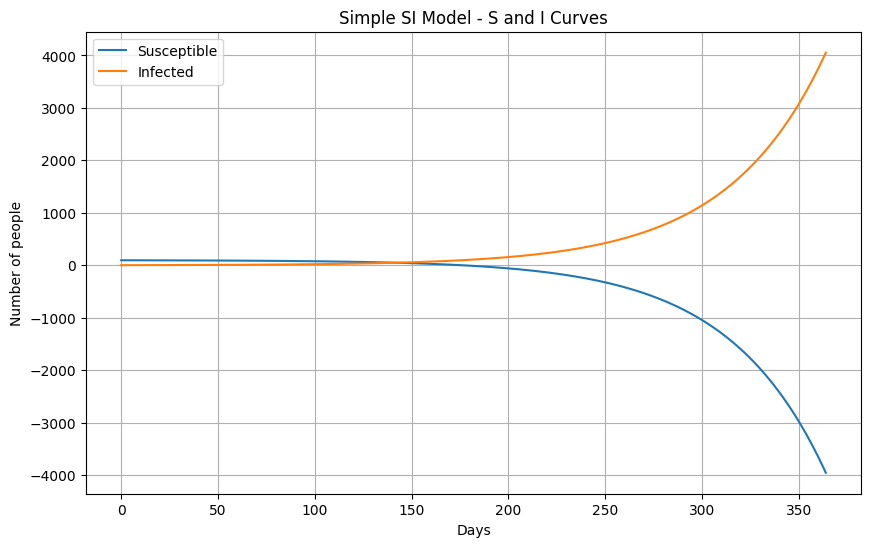

In [16]:
I_simple = simulate_simple_SI(N, I0, beta, nDays)
S_simple = N - I_simple

plt.figure(figsize=(10, 6))
plt.plot(S_simple, label='Susceptible')
plt.plot(I_simple, label='Infected')
plt.xlabel('Days')
plt.ylabel('Number of people')
plt.title('Simple SI Model - S and I Curves')
plt.legend()
plt.grid(True)

plt.savefig("./SI_Infection_1_3.png", bbox_inches='tight')

plt.show()

In [18]:
def simulate_realistic_SI(N, I0, beta, nDays):

    I = np.zeros(nDays)
    S = np.zeros(nDays)
    I[0] = I0
    S[0] = N - I0
    
    for t in range(1, nDays):
        new_infections = (beta/N) * I[t-1] * S[t-1]
        I[t] = I[t-1] + new_infections
        S[t] = S[t-1] - new_infections
    
    return I, S

In [19]:
nDays_2yr = 730
I_realistic, S_realistic = simulate_realistic_SI(N, I0, beta, nDays_2yr)

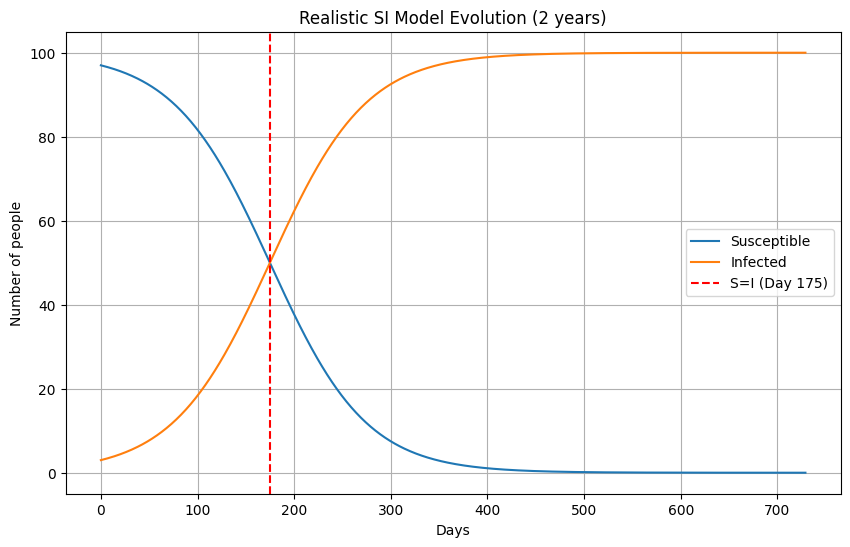

In [27]:
intersection_idx = np.argmin(np.abs(S_realistic - I_realistic))

plt.figure(figsize=(10, 6))
plt.plot(S_realistic, label='Susceptible')
plt.plot(I_realistic, label='Infected')
plt.axvline(x=intersection_idx, color='r', linestyle='--',
            label=f'S=I (Day {intersection_idx})')
plt.xlabel('Days')
plt.ylabel('Number of people')
plt.title('Realistic SI Model Evolution (2 years)')
plt.legend()
plt.grid(True)
plt.savefig("./SI_Infection_1_4.png", bbox_inches='tight')

plt.show()


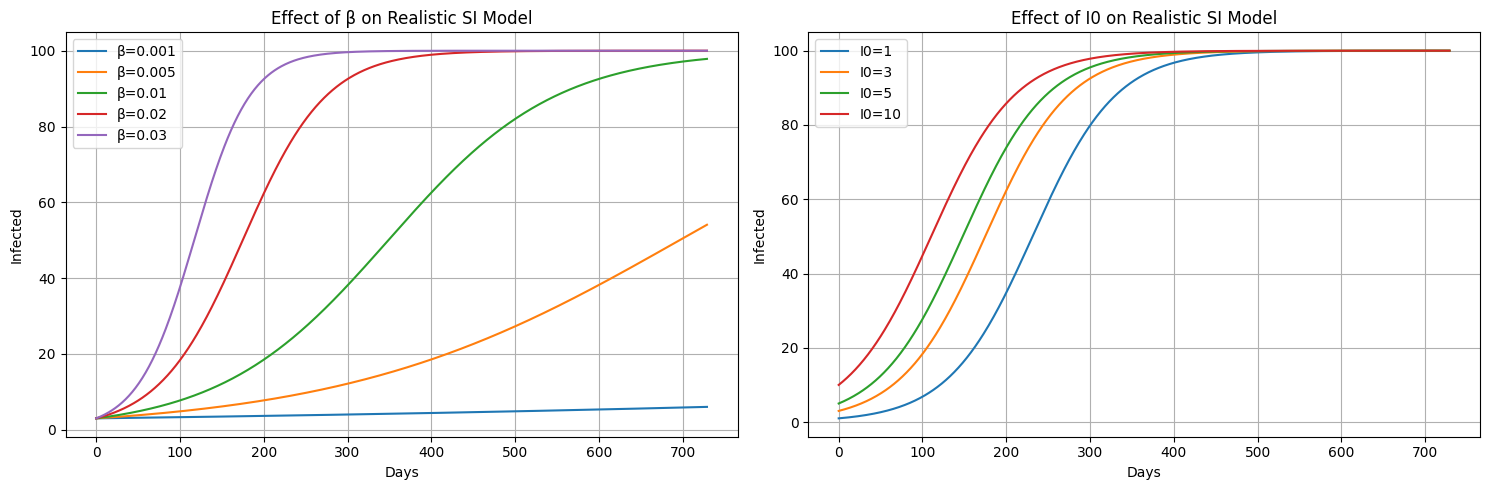

In [26]:
plt.figure(figsize=(15, 5))

# Vary beta
plt.subplot(121)
for b in [0.001, 0.005,0.01, 0.02, 0.03]:
    I, S = simulate_realistic_SI(N, I0, b, nDays_2yr)
    plt.plot(I, label=f'β={b}')
plt.title('Effect of β on Realistic SI Model')
plt.xlabel('Days')
plt.ylabel('Infected')
plt.legend()
plt.grid(True)


# Vary I0
plt.subplot(122)
for i0 in [1, 3, 5, 10]:
    I, S = simulate_realistic_SI(N, i0, beta, nDays_2yr)
    plt.plot(I, label=f'I0={i0}')
plt.title('Effect of I0 on Realistic SI Model')
plt.xlabel('Days')
plt.ylabel('Infected')
plt.legend()
plt.grid(True)
plt.savefig("./SI_Infection_1_5.png", bbox_inches='tight')

plt.tight_layout()
plt.show()


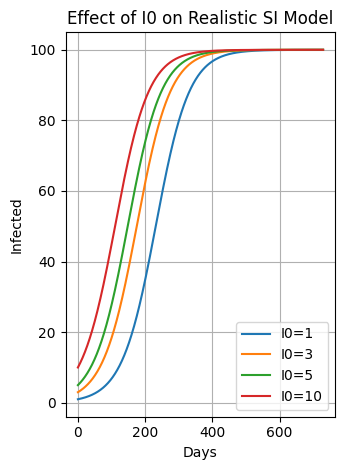

In [29]:
def simulate_SIS(N, I0, beta, gamma, nDays):

    I = np.zeros(nDays)
    S = np.zeros(nDays)
    I[0] = I0
    S[0] = N - I0
    
    for t in range(1, nDays):
        new_infections = (beta/N) * I[t-1] * S[t-1]
        recoveries = gamma * I[t-1]
        I[t] = I[t-1] + new_infections - recoveries
        S[t] = N - I[t]  # Maintain constant population
    
    return I, S


In [30]:
N = 100
I0 = 3
beta = 0.02
nDays = 730

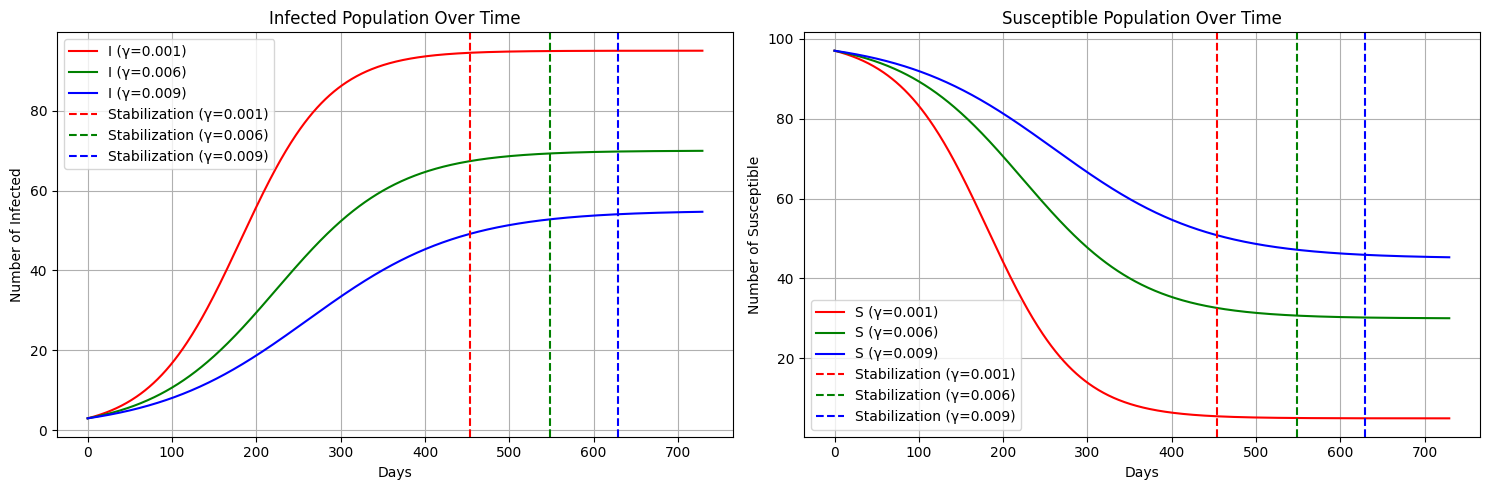

{0.001: np.int64(453), 0.006: np.int64(548), 0.009: np.int64(629)}

In [34]:
plt.figure(figsize=(15, 5))
gamma_values = [0.001, 0.006, 0.009]
colors = ['r', 'g', 'b']

stabilization_days = {}

for gamma, color in zip(gamma_values, colors):
    I, S = simulate_SIS(N, I0, beta, gamma, nDays)
    plt.subplot(121)
    plt.plot(I, label=f'I (γ={gamma})', color=color)
    plt.subplot(122)
    plt.plot(S, label=f'S (γ={gamma})', color=color)
    
    # Find stabilization day
    diff_I = np.diff(I)
    stabilization_day = np.where(np.abs(diff_I) < 1e-2)[0][0]
    stabilization_days[gamma] = stabilization_day

plt.subplot(121)
for gamma, color in zip(gamma_values, colors):
    plt.axvline(x=stabilization_days[gamma], color=color, linestyle='--', 
                label=f'Stabilization (γ={gamma})')

plt.title('Infected Population Over Time')
plt.xlabel('Days')
plt.ylabel('Number of Infected')
plt.legend()
plt.grid(True)

plt.subplot(122)
for gamma, color in zip(gamma_values, colors):
    plt.axvline(x=stabilization_days[gamma], color=color, linestyle='--', 
                label=f'Stabilization (γ={gamma})')

plt.title('Susceptible Population Over Time')
plt.xlabel('Days')
plt.ylabel('Number of Susceptible')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig("./SIS_2_1.png", bbox_inches='tight')

plt.show()

stabilization_days

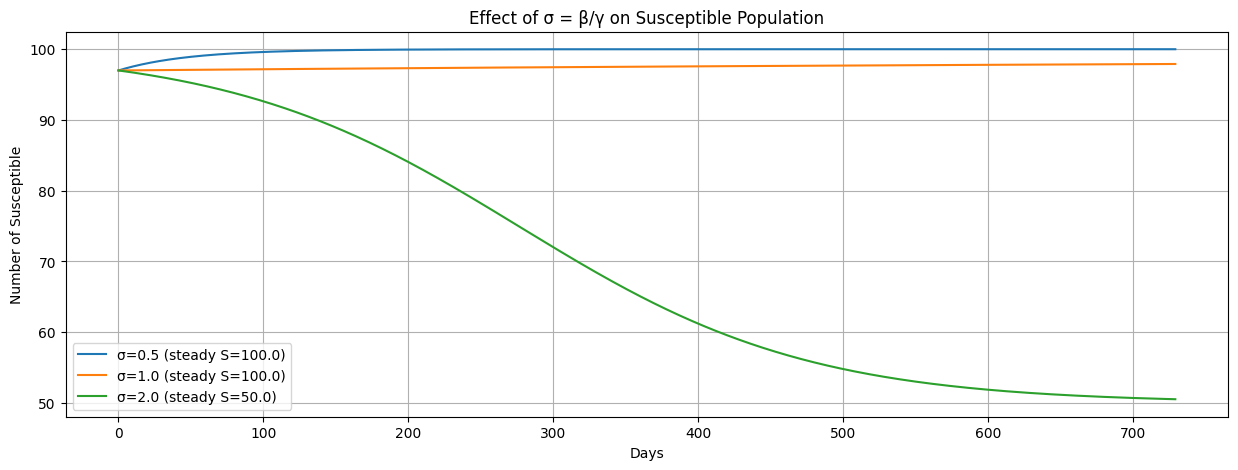

In [35]:
plt.figure(figsize=(15, 5))
beta = 0.02
sigma_values = [0.5, 1.0, 2.0]  # β/γ ratios

for sigma in sigma_values:
    gamma = beta/sigma
    I, S = simulate_SIS(N, I0, beta, gamma, nDays)
    
    if sigma > 1:
        I_steady = N * (1 - 1/sigma)
    else:
        I_steady = 0
    
    plt.plot(S, label=f'σ={sigma} (steady S={N-I_steady:.1f})')

plt.title('Effect of σ = β/γ on Susceptible Population')
plt.xlabel('Days')
plt.ylabel('Number of Susceptible')
plt.legend()
plt.grid(True)

plt.savefig("./SIS_2_2.png", bbox_inches='tight')
plt.show()
